In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("../data/logfile-storage-v3.csv", delimiter=";")
dataset.head()

,datacenter_id,datacenter_name,datacenter_storage_energy,storage_id,system,storage_capacity,capacity_used,active_duration,idle_intervals,duration,total_energy_active,total_energy_idle,average_rotation_latency,average_seek_Time,max_internal_data_transfer_rate,is_active,idle_power,active_power,files,Unnamed: 19
0,3,datacenter,74620.259307,1,storage,900000.0,14848.0,75.045989,1.000011843801415:,316.533532,435.266735,3.000036,0.003,0.004,198.0,False,3.0,5.8,"55596,3072,15.527644938419229:2-878231,1024,5....",NaN
1,3,datacenter,74620.259307,2,storage,900000.0,25088.0,126.765213,1.0000001634360047:,316.533532,735.238233,3.000000,0.003,0.004,198.0,False,3.0,5.8,"1-612639,4096,20.692570051259533:304371,3584,1...",NaN
2,3,datacenter,74620.259307,3,storage,900000.0,24576.0,139.717016,1.000000197764156:,316.533532,810.358690,3.000001,0.003,0.004,198.0,False,3.0,5.8,"1-55872,3072,15.521324441002905:303623,3584,18...",NaN
3,3,datacenter,74620.259307,4,storage,900000.0,30720.0,168.149131,1.0000003700028652:,316.533532,975.264957,3.000001,0.003,0.004,198.0,False,3.0,5.8,"1-878237,1024,5.187122965529541:304462,3584,18...",NaN
4,3,datacenter,74620.259307,5,storage,900000.0,12800.0,64.705854,1.0000004590101392:,316.533532,375.293953,3.000001,0.003,0.004,198.0,False,3.0,5.8,"16601,512,2.596673335321235:285602,512,2.60125...",NaN


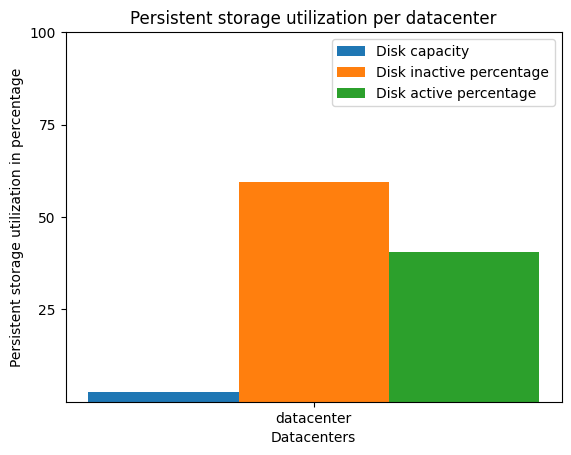

In [2]:
labels, values = np.unique(dataset['datacenter_name'], return_counts=True)
datacenter_total_storage_capacity = np.array([])
datacenter_used_storage_capacity = np.array([])

datacenter_total_duration = np.array([])
datacenter_inactive_duration = np.array([])
datacenter_active_duration = np.array([])

for i in range(len(labels)):
    total_storage_capacity = 0
    used_storage_capacity = 0
    
    total_disk_duration = 0
    disk_inactive_duration = 0
    disk_active_duration = 0
    
    for index, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        total_storage_capacity += sample['storage_capacity']
        used_storage_capacity += sample['capacity_used']
        
        # idle_duration = 0
        # for idle_interval in sample['idle_intervals'].split(":"):
        #     if idle_interval != '':
        #         idle_duration += float(idle_interval)
        disk_inactive_duration += float(sample['duration']) - float(sample['active_duration'])
        disk_active_duration += float(sample['active_duration'])
        total_disk_duration += (float(sample['duration']))
    
    datacenter_total_storage_capacity = np.append(datacenter_total_storage_capacity, total_storage_capacity)
    datacenter_used_storage_capacity = np.append(datacenter_used_storage_capacity, used_storage_capacity)
    
    datacenter_inactive_duration = np.append(datacenter_inactive_duration, disk_inactive_duration)
    datacenter_active_duration = np.append(datacenter_active_duration, disk_active_duration)
    datacenter_total_duration = np.append(datacenter_total_duration, total_disk_duration)


x = np.arange(len(labels))

bar_width = 0.2
plt.bar(x - bar_width, np.divide(datacenter_used_storage_capacity, datacenter_total_storage_capacity)*100, bar_width, label="Disk capacity")
plt.bar(x, np.divide(datacenter_inactive_duration, datacenter_total_duration)*100, bar_width, label="Disk inactive percentage")
plt.bar(x + bar_width, np.divide(datacenter_active_duration, datacenter_total_duration)*100, bar_width, label="Disk active percentage")

plt.xticks(x, labels)
plt.yticks([25, 50, 75, 100])
plt.ylim((0, 100))
plt.xlabel("Datacenters")
plt.ylabel("Persistent storage utilization in percentage")
plt.title("Persistent storage utilization per datacenter")
plt.legend()
plt.show()


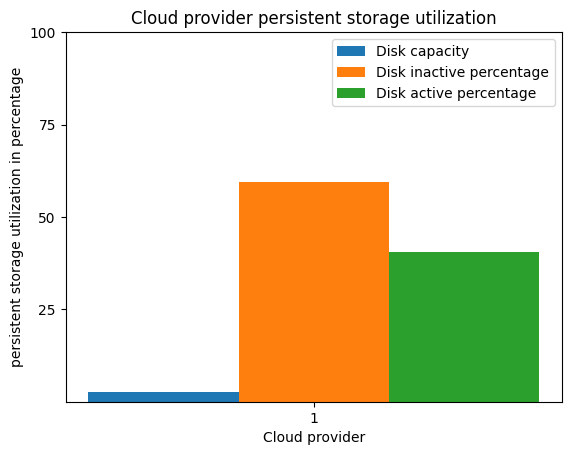

In [3]:
bar_width = 0.2
plt.bar(1 - bar_width, np.mean(datacenter_used_storage_capacity)/np.mean(datacenter_total_storage_capacity)*100, bar_width, label="Disk capacity")
plt.bar(1, np.mean(datacenter_inactive_duration)/np.mean(datacenter_total_duration)*100, bar_width, label="Disk inactive percentage")
plt.bar(1 + bar_width, np.mean(datacenter_active_duration)/np.mean(datacenter_total_duration)*100, bar_width, label="Disk active percentage")
plt.xlabel("Cloud provider")
plt.ylabel("persistent storage utilization in percentage")
plt.xticks([1])
plt.yticks([25,50,75,100])
plt.title("Cloud provider persistent storage utilization")
plt.legend()
plt.show()

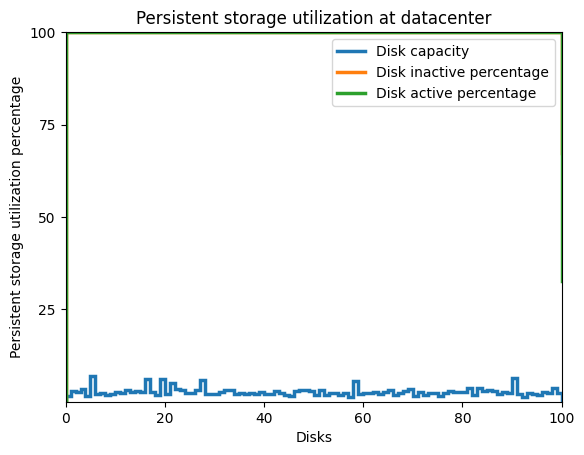

In [4]:
labels = np.unique(dataset['datacenter_name'])

for i in range(len(labels)):
    disk_capacity = np.array([])
    disk_capacity_used = np.array([])
    
    disk_total_duration = np.array([])
    disk_inactive_duration = np.array([])
    disk_active_duration = np.array([])
    
    for index, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        disk_capacity = np.append(disk_capacity, sample['storage_capacity'])
        disk_capacity_used = np.append(disk_capacity_used, sample['capacity_used'])
        
        # idle_duration = 0
        # for idle_interval in sample['idle_intervals'].split(":"):
        #     if idle_interval != '':
        #         idle_duration += float(idle_interval)
        
        disk_inactive_duration = np.append(disk_capacity, float(sample['duration']) - float(sample['active_duration']))
        disk_active_duration = np.append(disk_capacity, float(sample['active_duration']))
        disk_total_duration = np.append(disk_capacity, float(sample['duration']))
    
    fig, ax = plt.subplots()
    ax.stairs(np.divide(disk_capacity_used, disk_capacity)*100, linewidth=2.5, label="Disk capacity")
    ax.stairs(np.divide(disk_inactive_duration, disk_total_duration)*100, linewidth=2.5, label="Disk inactive percentage")
    ax.stairs(np.divide(disk_active_duration, disk_total_duration)*100, linewidth=2.5, label="Disk active percentage")
    ax.set(xlim=(0, len(disk_capacity_used)), ylim=(0,100), yticks=np.array([25,50,75,100])) #xticks=np.arange(1,len(host_availablePEs))
    plt.ylabel("Persistent storage utilization percentage")
    plt.xlabel("Disks")
    plt.title(f"Persistent storage utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()